In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv(file_path, encoding='cp1251')

# Переглянемо перші рядки даних, щоб переконатися, що все завантажено правильно
print(data.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

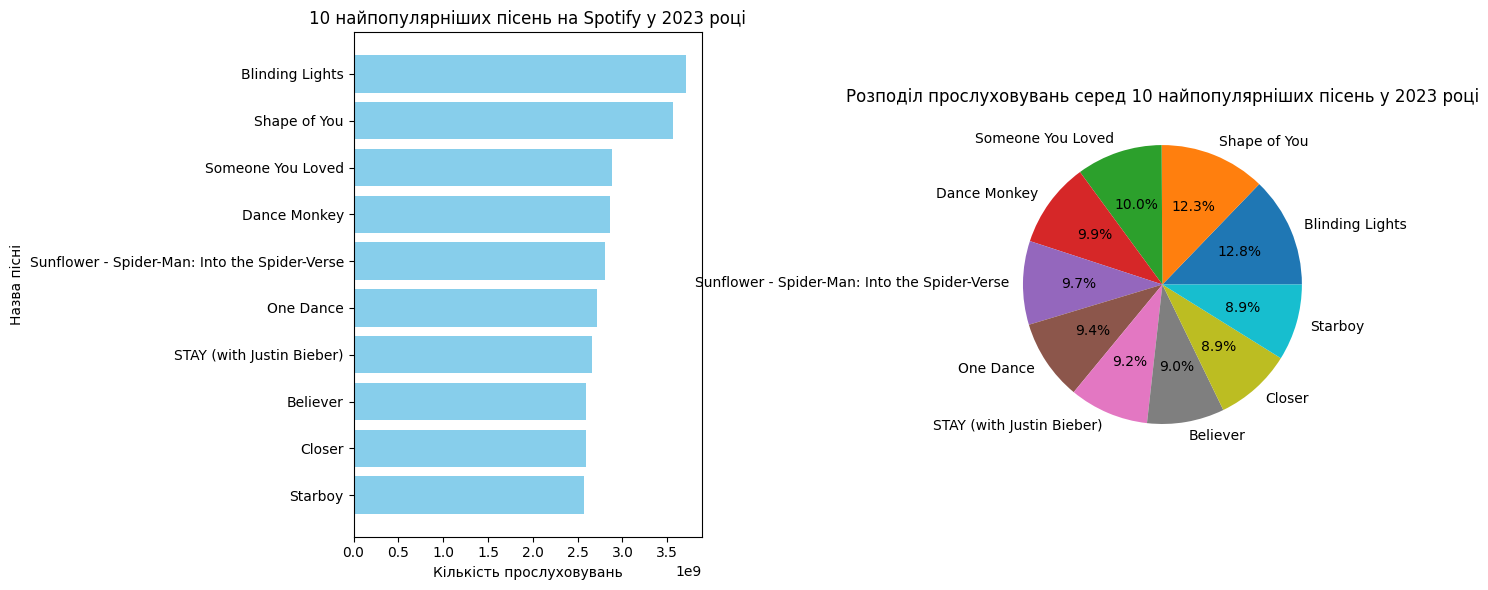

In [7]:
#1.Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

Побудувати кругову діаграму для тих самих даних.
# Конвертація стовпця 'streams' у числовий формат
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Вибірка 10 найбільших значень у стовпці 'streams'
top_songs = data.nlargest(10, 'streams')

# Побудуємо горизонтальну стовпчикову діаграму
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Перший графік у рядку з двома графіками
plt.barh(top_songs['track_name'], top_songs['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()

# Побудуємо кругову діаграму
plt.subplot(1, 2, 2)  # Другий графік у рядку з двома графіками
plt.pie(top_songs['streams'], labels=top_songs['track_name'], autopct='%1.1f%%')
plt.title('Розподіл прослуховувань серед 10 найпопулярніших пісень у 2023 році')

plt.tight_layout()  # Покращує просторове розташування графіків
plt.show()


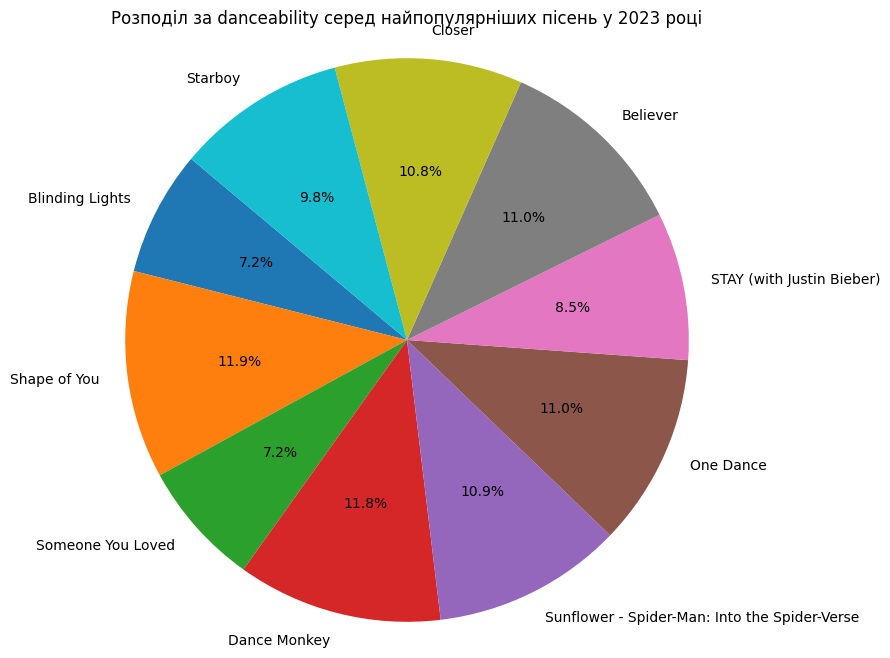

In [11]:
#2.Створіть кругову діаграму або секторну діаграму, яка відображає розподіл за danceability серед найпопулярніших пісень у 2023 році.
plt.figure(figsize=(8, 8))
plt.pie(top_songs['danceability_%'], labels=top_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл за danceability серед найпопулярніших пісень у 2023 році')
plt.axis('equal')  # Забезпечуємо відображення кола відносно круга
plt.show()


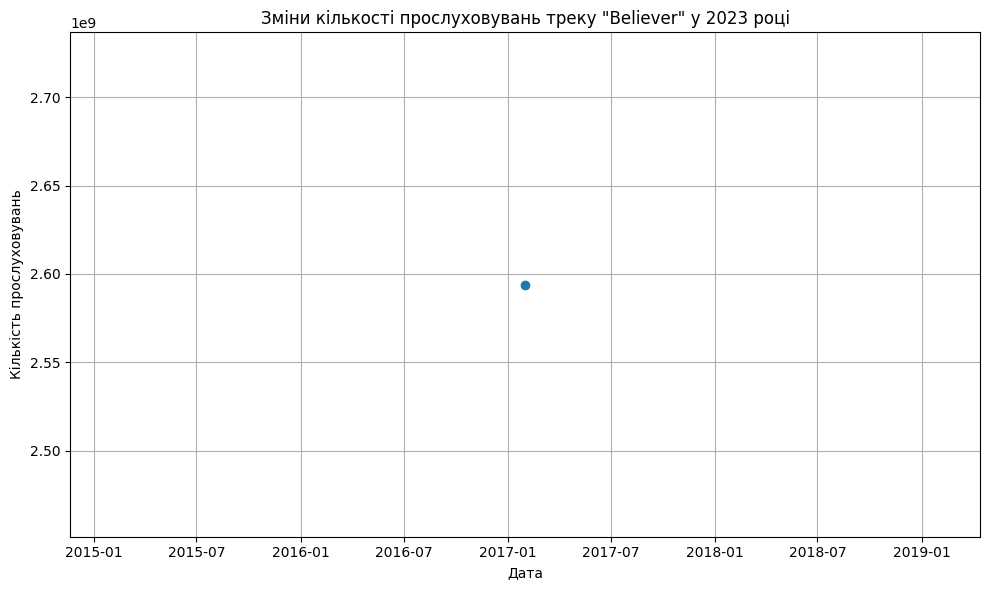

In [26]:
#3.Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.
# Об'єднаємо рік, місяць і день релізу в один стовпець 'date'
data['date'] = pd.to_datetime(data[['released_year', 'released_month', 'released_day']].rename(columns={'released_year': 'year', 'released_month': 'month', 'released_day': 'day'}), errors='coerce')

# Виберемо конкретний трек
specific_track = "Believer"
specific_track_data = data[data['track_name'] == specific_track]

plt.figure(figsize=(10, 6))
plt.plot(specific_track_data['date'], specific_track_data['streams'], marker='o', linestyle='-')
plt.xlabel('Дата')
plt.ylabel('Кількість прослуховувань')
plt.title('Зміни кількості прослуховувань треку "{}" у 2023 році'.format(specific_track))
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-30-df20e3712443>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_artists = data.groupby('artist(s)_name').sum().nlargest(10, 'streams')


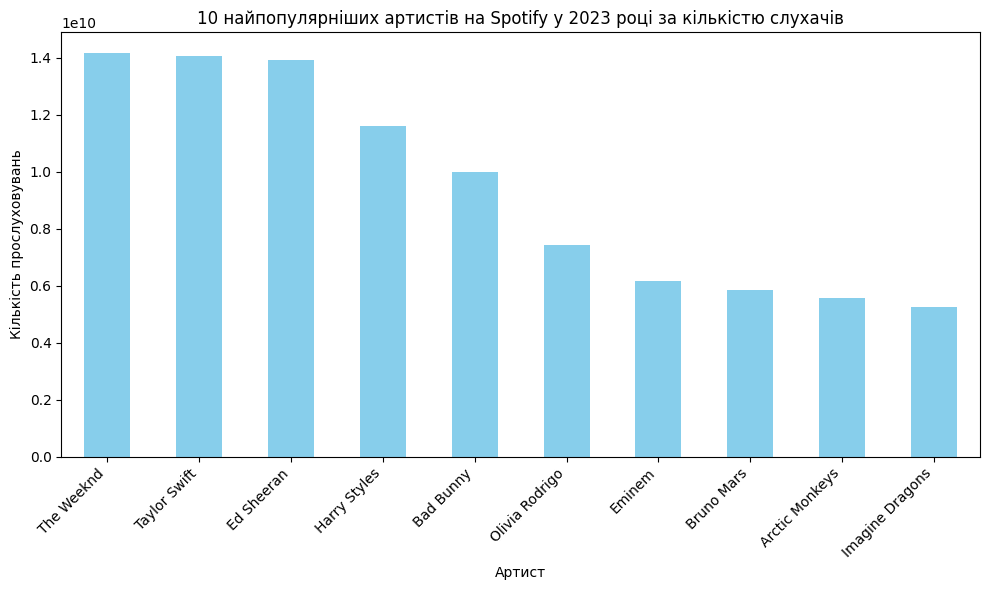

In [30]:
#4.Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.
# Згрупуємо дані за іменем артиста та обчислимо загальну кількість прослуховувань для кожного артиста
top_artists = data.groupby('artist(s)_name').sum().nlargest(10, 'streams')

# Побудуємо стовпчикову діаграму для відображення 10 найпопулярніших артистів
plt.figure(figsize=(10, 6))
top_artists['streams'].plot(kind='bar', color='skyblue')
plt.xlabel('Артист')
plt.ylabel('Кількість прослуховувань')
plt.title('10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


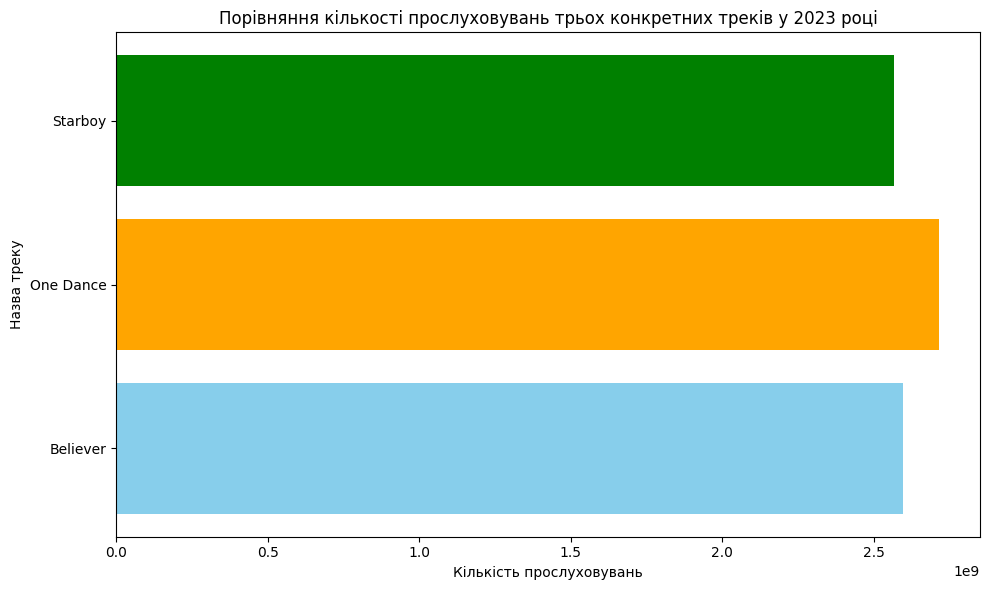

In [32]:
#5.Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.
track1 = "Believer"
track2 = "One Dance"
track3 = "Starboy"

# Фільтруємо дані за вибраними треками
track1_data = data[data['track_name'] == track1]
track2_data = data[data['track_name'] == track2]
track3_data = data[data['track_name'] == track3]

# Обчислюємо сумарну кількість прослуховувань для кожного треку
track1_streams = track1_data['streams'].sum()
track2_streams = track2_data['streams'].sum()
track3_streams = track3_data['streams'].sum()

# Побудова горизонтальної стовпчикової діаграми
plt.figure(figsize=(10, 6))
plt.barh([track1, track2, track3], [track1_streams, track2_streams, track3_streams], color=['skyblue', 'orange', 'green'])
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва треку')
plt.title('Порівняння кількості прослуховувань трьох конкретних треків у 2023 році')
plt.tight_layout()
plt.show()
